# Mapping data to the Self-organizing Map

In this tutorial we present the procedure of mapping data to a trained SOM.

First the trained SOM will be loaded:

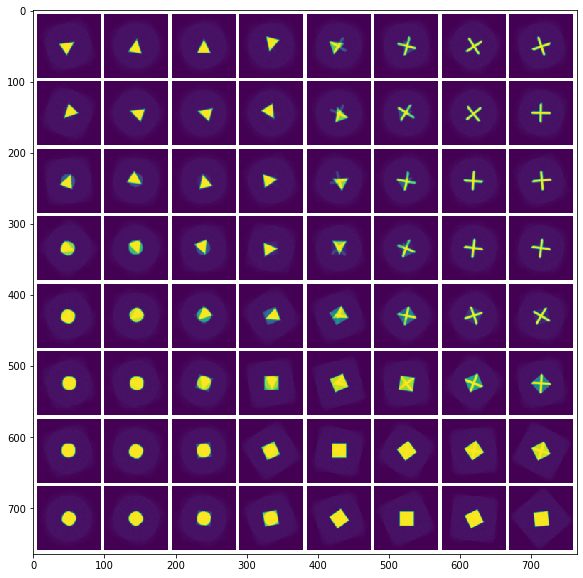

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pink
import tools

np_som = np.load("data/som-shapes-cartesian2d-8x8.npy")
som = pink.SOM(np_som)

fig = plt.figure(figsize=(10,10))
plt.imshow(tools.show(som, border=5))

Load data image, which should be mapped.

shape:      (64, 64)
min value:  4.5595434e-06
max value:  1.0


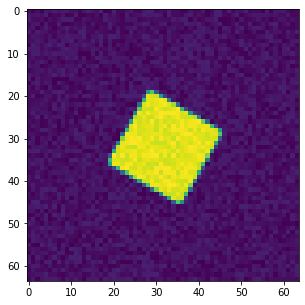

In [2]:
image = np.load("data/shapes/boxes.npy").astype(np.float32)[0]
#image = np.load("data/shapes/circles.npy").astype(np.float32)[0]
#image = np.load("data/shapes/crosses.npy").astype(np.float32)[0]
#image = np.load("data/shapes/triangles.npy").astype(np.float32)[0]
image /= np.amax(image)

fig = plt.figure(figsize=(5,5))
plt.imshow(image)

print('shape:     ', image.shape)
print('min value: ', np.amin(image))
print('max value: ', np.amax(image))

The Mapper is calculating the euclidean distance to each neuron, which indicate the similarity to each neuron. The second return value gives the transformation operation index for the best similarity. The storage order is identical to the SOM.

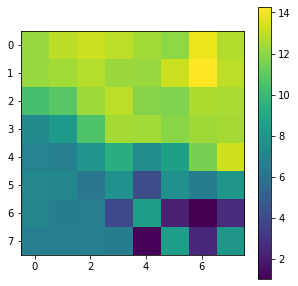

In [3]:
import math

number_of_rotations = 360
euclid_dim = int(image.shape[0] * math.sqrt(2.0) / 2.0)

mapper = pink.Mapper(som, number_of_rotations=number_of_rotations, euclidean_distance_dim=euclid_dim)
euclidean_distances, transformations = mapper(pink.Data(image))

heatmap = np.array(euclidean_distances).reshape(8, 8)

fig = plt.figure(figsize=(5,5))
plt.imshow(heatmap)
plt.colorbar()

The second return value gives the transformation operation index for the best similarity.

In [4]:
print(np.array(transformations).reshape(8, 8))

[[593 311  43 126 573 485 300 295]
 [179  36  36 683 483 570 302 719]
 [311 233 486 671  40 601 719 179]
 [313 670 670 581 131 566 719 629]
 [310 408 449 483 396 504 204 566]
 [131 131 123 395 371  26 646 629]
 [221 311 395 646 123 449 429 552]
 [ 41 588 126 656 534  33 456 568]]


From the transformation index the information if the image was flipped can be extracted by checking if the it is larger or equal than the number of rotations ...

In [5]:
is_flipped = (np.array(transformations).reshape(8, 8) >= number_of_rotations)
print(is_flipped)

[[ True False False False  True  True False False]
 [False False False  True  True  True False  True]
 [False False  True  True False  True  True False]
 [False  True  True  True False  True  True  True]
 [False  True  True  True  True  True False  True]
 [False False False  True  True False  True  True]
 [False False  True  True False  True  True  True]
 [False  True False  True  True False  True  True]]


... and the rotation angle in radian by multiplication with 2 * pi / the number of rotations.

In [6]:
import math

rotation_angle = ((np.array(transformations).reshape(8, 8) - is_flipped * number_of_rotations)
               * 2 * math.pi / number_of_rotations)
np.set_printoptions(precision=2)
print(rotation_angle)

[[4.07 5.43 0.75 2.2  3.72 2.18 5.24 5.15]
 [3.12 0.63 0.63 5.64 2.15 3.67 5.27 6.27]
 [5.43 4.07 2.2  5.43 0.7  4.21 6.27 3.12]
 [5.46 5.41 5.41 3.86 2.29 3.6  6.27 4.69]
 [5.41 0.84 1.55 2.15 0.63 2.51 3.56 3.6 ]
 [2.29 2.29 2.15 0.61 0.19 0.45 4.99 4.69]
 [3.86 5.43 0.61 4.99 2.15 1.55 1.2  3.35]
 [0.72 3.98 2.2  5.17 3.04 0.58 1.68 3.63]]
